# Project 09: SVM Classification

This notebook explores Support Vector Machine (SVM) classification using two popular datasets from scikit-learn:
1. Breast Cancer Wisconsin Dataset
2. Iris Dataset

We'll demonstrate how to implement SVM classifiers with different parameters, preprocessing techniques, and evaluate their performance. We'll also explore feature selection and scaling effects on model accuracy.

## 1. Setup and Import Libraries

In [50]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC, SVC

# Set random seed for reproducibility
np.random.seed(42)

# Set up plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 2. Dataset Exploration: Breast Cancer Wisconsin

In [51]:
# Load the Breast Cancer dataset
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)

# Display dataset description
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [52]:
# Extract features and target
X_bc = data_breast_cancer['data']
y_bc = data_breast_cancer['target']

# Display summary information
print(f"Dataset Shape: {X_bc.shape}")
print(f"Feature Names: {data_breast_cancer['feature_names']}")
print(f"Target Names: {data_breast_cancer['target_names']}")
print(f"Class Distribution: {np.bincount(y_bc)}")

# Display the first few rows
X_bc.head()

Dataset Shape: (569, 30)
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names: ['malignant' 'benign']
Class Distribution: [212 357]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


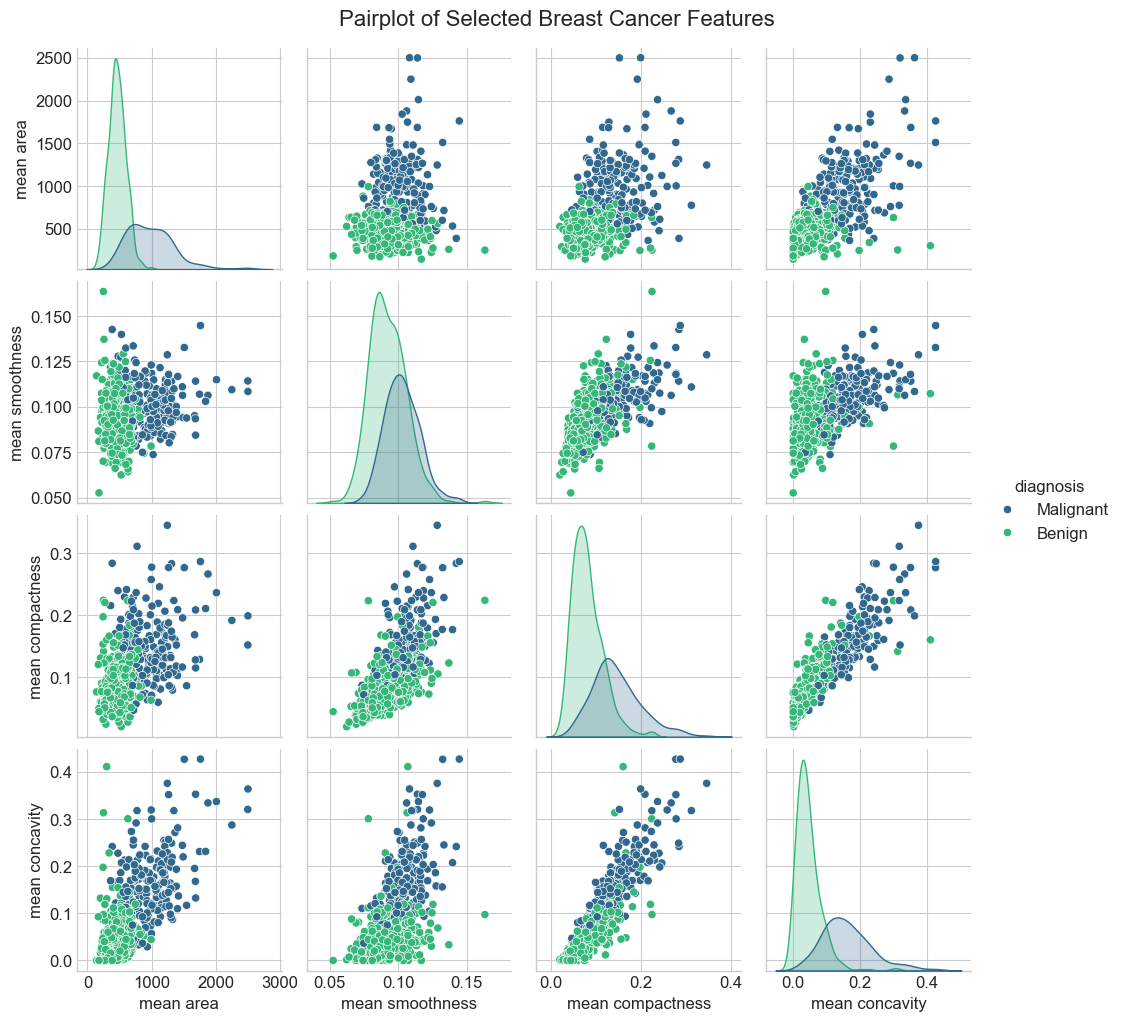

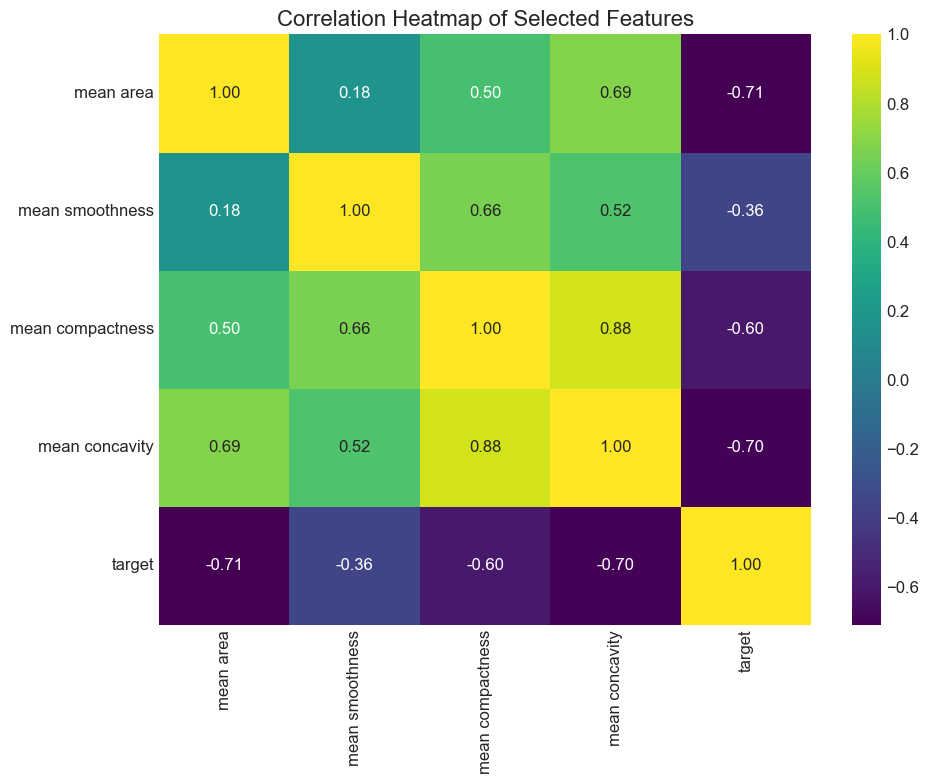

In [53]:
# Explore correlations and distributions for selected features

# Add target to the dataframe for easier visualization
bc_df = X_bc.copy()
bc_df['target'] = y_bc
bc_df['diagnosis'] = bc_df['target'].map({0: 'Malignant', 1: 'Benign'})

# Create pairplot for selected features
selected_features = ['mean area', 'mean smoothness', 'mean compactness', 'mean concavity']
sns.pairplot(bc_df, vars=selected_features, hue='diagnosis', palette='viridis')
plt.suptitle('Pairplot of Selected Breast Cancer Features', y=1.02, fontsize=16)
plt.show()

# Create correlation heatmap for selected features
plt.figure(figsize=(10, 8))
correlation_matrix = bc_df[selected_features + ['target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features', fontsize=16)
plt.tight_layout()
plt.show()

## 3. Dataset Exploration: Iris

In [54]:
# Load the Iris dataset
data_iris = datasets.load_iris(as_frame=True)

# Display dataset description
print(data_iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [55]:
# Extract features and target
X_iris = data_iris['data']
y_iris_original = data_iris['target']

# Display summary information
print(f"Dataset Shape: {X_iris.shape}")
print(f"Feature Names: {data_iris['feature_names']}")
print(f"Target Names: {data_iris['target_names']}")
print(f"Class Distribution: {np.bincount(y_iris_original)}")

# Display the first few rows
X_iris.head()

Dataset Shape: (150, 4)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
Class Distribution: [50 50 50]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


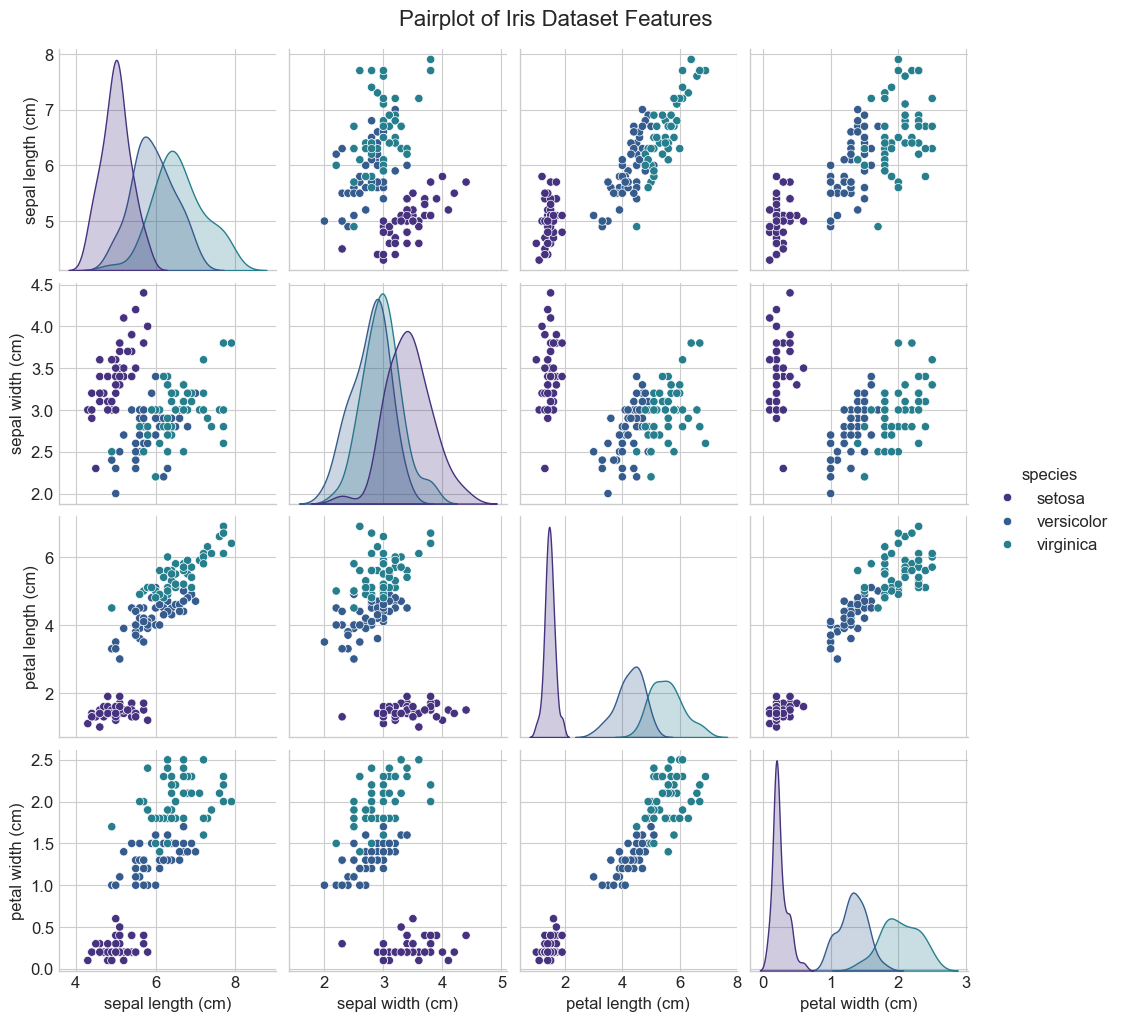

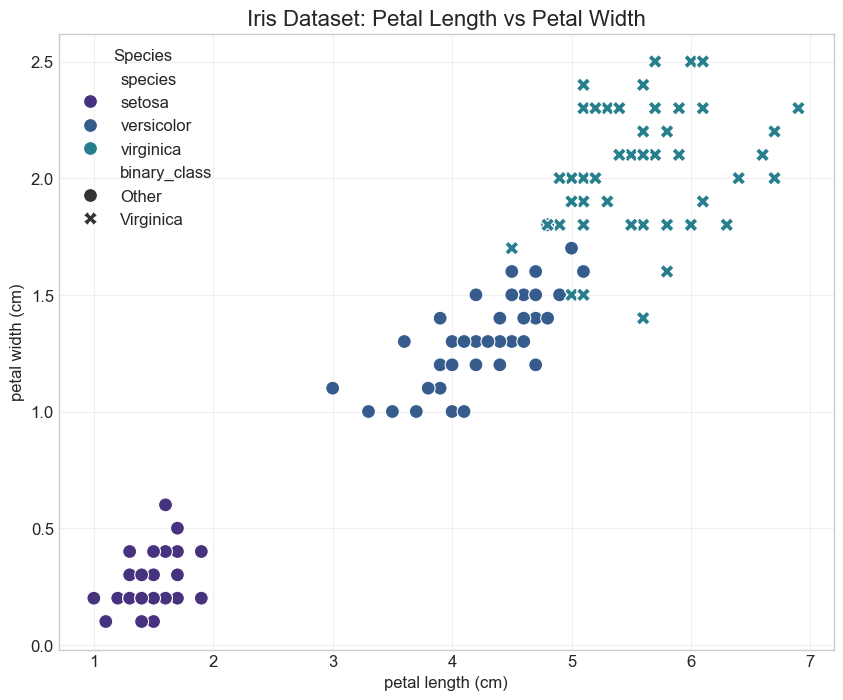

In [56]:
# Create binary classification task: Virginica vs Others
y_iris = (data_iris.target == 2).astype(int)  # 1 for Virginica, 0 for others

# Add target to dataframe for visualization
iris_df = X_iris.copy()
iris_df['original_target'] = y_iris_original
iris_df['species'] = iris_df['original_target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df['binary_target'] = y_iris
iris_df['binary_class'] = iris_df['binary_target'].map({0: 'Other', 1: 'Virginica'})

# Create pairplot for all features
sns.pairplot(iris_df, vars=data_iris['feature_names'], hue='species')
plt.suptitle('Pairplot of Iris Dataset Features', y=1.02, fontsize=16)
plt.show()

# Focus on petal length and width which seem most discriminative
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='petal length (cm)', 
    y='petal width (cm)', 
    hue='species',
    style='binary_class',
    s=100,
    data=iris_df
)
plt.title('Iris Dataset: Petal Length vs Petal Width', fontsize=16)
plt.legend(title='Species', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 4. SVM Classification for Breast Cancer Dataset

In [57]:
# Split the breast cancer data into training and testing sets
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(
    X_bc, y_bc, test_size=0.2, random_state=42
)

print(f"Training set size: {X_bc_train.shape}")
print(f"Test set size: {X_bc_test.shape}")

Training set size: (455, 30)
Test set size: (114, 30)


In [58]:
# Create function to train SVM models and evaluate performance
def train_evaluate_svm(X_train, y_train, X_test, y_test, features=None, scale=False, C=1.0, kernel='linear'):
    
    # Select features if provided
    if features is not None:
        X_train_selected = X_train[features]
        X_test_selected = X_test[features]
    else:
        X_train_selected = X_train
        X_test_selected = X_test
    
    # Scale features if requested
    if scale:
        scaler = StandardScaler()
        X_train_processed = scaler.fit_transform(X_train_selected)
        X_test_processed = scaler.transform(X_test_selected)
    else:
        X_train_processed = X_train_selected
        X_test_processed = X_test_selected
    
    # Choose SVM model type
    if kernel == 'linear':
        # Use LinearSVC for faster linear SVM
        model = LinearSVC(C=C, loss='hinge', random_state=42)
    else:
        # Use SVC for non-linear kernels
        model = SVC(C=C, kernel=kernel, random_state=42)
    
    # Train model
    model.fit(X_train_processed, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_processed)
    y_test_pred = model.predict(X_test_processed)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Calculate confusion matrix for test set
    test_cm = confusion_matrix(y_test, y_test_pred)
    
    # Return results
    results = {
        'model': model,
        'scaler': scaler if scale else None,
        'features': features,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'confusion_matrix': test_cm,
        'y_test_pred': y_test_pred,
        'C': C,
        'kernel': kernel,
        'scaled': scale
    }
    
    return results

In [ ]:
# Visualize confusion matrix
def plot_confusion_matrix(cm, class_names=None, title='Confusion Matrix'):
    
    if class_names is None:
        class_names = ['Class 0', 'Class 1']
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='viridis',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.title(title, fontsize=16)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.show()

SVM with features: ['mean area', 'mean smoothness']
Training Accuracy: 0.6286
Test Accuracy: 0.6228


c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


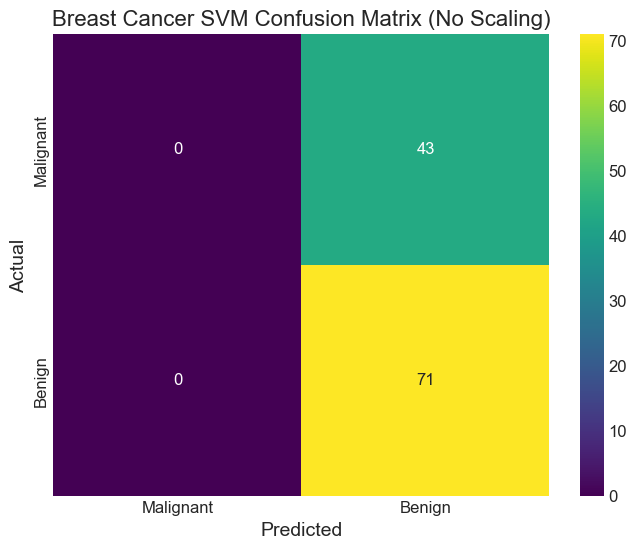

In [60]:
# Train SVM with two selected features without scaling
bc_features = ['mean area', 'mean smoothness']
bc_svm_results = train_evaluate_svm(
    X_bc_train, y_bc_train, X_bc_test, y_bc_test,
    features=bc_features,
    scale=False,
    C=1.0
)

# Print results
print(f"SVM with features: {bc_features}")
print(f"Training Accuracy: {bc_svm_results['train_accuracy']:.4f}")
print(f"Test Accuracy: {bc_svm_results['test_accuracy']:.4f}")

# Plot confusion matrix
plot_confusion_matrix(
    bc_svm_results['confusion_matrix'],
    class_names=['Malignant', 'Benign'],
    title='Breast Cancer SVM Confusion Matrix (No Scaling)'
)

SVM with features: ['mean area', 'mean smoothness'] (with scaling)
Training Accuracy: 0.9055
Test Accuracy: 0.9386


c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


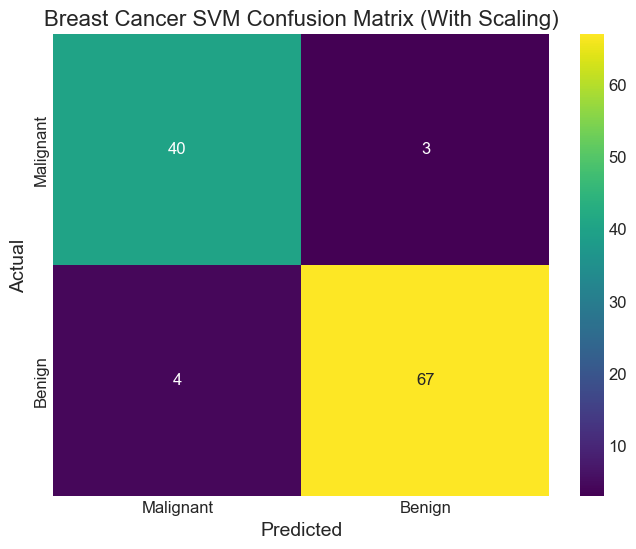

In [61]:
# Train SVM with two selected features with scaling
bc_svm_scaled_results = train_evaluate_svm(
    X_bc_train, y_bc_train, X_bc_test, y_bc_test,
    features=bc_features,
    scale=True,
    C=500.0  # Higher C value for less regularization
)

# Print results
print(f"SVM with features: {bc_features} (with scaling)")
print(f"Training Accuracy: {bc_svm_scaled_results['train_accuracy']:.4f}")
print(f"Test Accuracy: {bc_svm_scaled_results['test_accuracy']:.4f}")

# Plot confusion matrix
plot_confusion_matrix(
    bc_svm_scaled_results['confusion_matrix'],
    class_names=['Malignant', 'Benign'],
    title='Breast Cancer SVM Confusion Matrix (With Scaling)'
)

# Save breast cancer accuracy results
bc_acc = [
    bc_svm_results['train_accuracy'],
    bc_svm_results['test_accuracy'],
    bc_svm_scaled_results['train_accuracy'],
    bc_svm_scaled_results['test_accuracy']
]

with open('data/bc_acc.pkl', 'wb') as f:
    pickle.dump(bc_acc, f)

In [ ]:
# Visualize decision boundary for two selected features
def plot_decision_boundary(X, y, model, scaler=None, feature_names=None, class_names=None):
    
    if feature_names is None:
        feature_names = ['Feature 1', 'Feature 2']
    
    if class_names is None:
        class_names = ['Class 0', 'Class 1']
    
    # Create meshgrid for contour plot
    h = 0.02  # Step size in mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Create mesh points
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Scale if needed
    if scaler is not None:
        mesh_points = scaler.transform(mesh_points)
    
    # Predict class labels for mesh points
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Create plot
    plt.figure(figsize=(12, 8))
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    
    # Plot training points
    for i, label in enumerate(np.unique(y)):
        mask = y == label
        plt.scatter(
            X.iloc[mask, 0], X.iloc[mask, 1],
            label=class_names[i],
            edgecolors='k', alpha=0.8, s=80
        )
    
    plt.title(f'Decision Boundary', fontsize=16)
    plt.xlabel(feature_names[0], fontsize=14)
    plt.ylabel(feature_names[1], fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.colorbar(label='Predicted Class')
    plt.tight_layout()
    plt.show()

## 5. SVM Classification for Iris Dataset

In [63]:
# Split the iris data into training and testing sets
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42
)

print(f"Training set size: {X_iris_train.shape}")
print(f"Test set size: {X_iris_test.shape}")

Training set size: (120, 4)
Test set size: (30, 4)


SVM with features: ['petal length (cm)', 'petal width (cm)']
Training Accuracy: 0.9583
Test Accuracy: 0.9667


c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


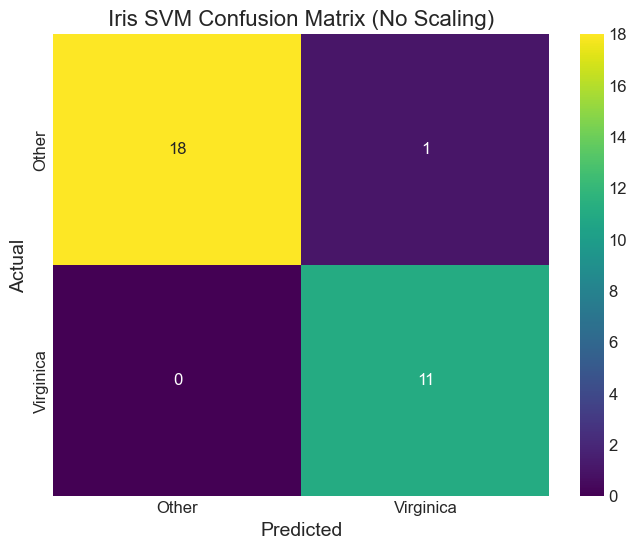

In [64]:
# Train SVM with selected features without scaling
iris_features = ['petal length (cm)', 'petal width (cm)']
iris_svm_results = train_evaluate_svm(
    X_iris_train, y_iris_train, X_iris_test, y_iris_test,
    features=iris_features,
    scale=False,
    C=32.0
)

# Print results
print(f"SVM with features: {iris_features}")
print(f"Training Accuracy: {iris_svm_results['train_accuracy']:.4f}")
print(f"Test Accuracy: {iris_svm_results['test_accuracy']:.4f}")

# Plot confusion matrix
plot_confusion_matrix(
    iris_svm_results['confusion_matrix'],
    class_names=['Other', 'Virginica'],
    title='Iris SVM Confusion Matrix (No Scaling)'
)

c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM with features: ['petal length (cm)', 'petal width (cm)'] (with scaling)
Training Accuracy: 0.9667
Test Accuracy: 1.0000


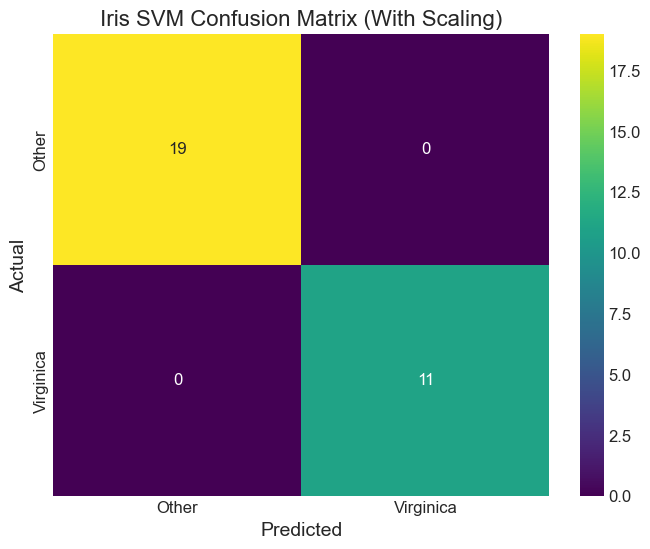

In [65]:
# Train SVM with selected features with scaling
iris_svm_scaled_results = train_evaluate_svm(
    X_iris_train, y_iris_train, X_iris_test, y_iris_test,
    features=iris_features,
    scale=True,
    C=702.0  # Higher C value for less regularization
)

# Print results
print(f"SVM with features: {iris_features} (with scaling)")
print(f"Training Accuracy: {iris_svm_scaled_results['train_accuracy']:.4f}")
print(f"Test Accuracy: {iris_svm_scaled_results['test_accuracy']:.4f}")

# Plot confusion matrix
plot_confusion_matrix(
    iris_svm_scaled_results['confusion_matrix'],
    class_names=['Other', 'Virginica'],
    title='Iris SVM Confusion Matrix (With Scaling)'
)

# Save iris accuracy results
iris_acc = [
    iris_svm_results['train_accuracy'],
    iris_svm_results['test_accuracy'],
    iris_svm_scaled_results['train_accuracy'],
    iris_svm_scaled_results['test_accuracy']
]

with open('data/iris_acc.pkl', 'wb') as f:
    pickle.dump(iris_acc, f)

## 6. Non-Linear SVM with RBF Kernel

SVM with RBF kernel for features: ['petal length (cm)', 'petal width (cm)']
Training Accuracy: 0.9500
Test Accuracy: 1.0000


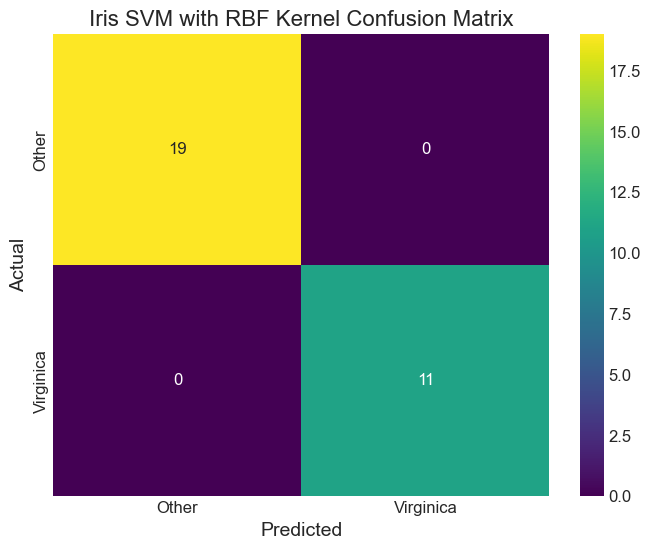

In [66]:
# Train non-linear SVM with RBF kernel for the iris dataset
iris_rbf_results = train_evaluate_svm(
    X_iris_train, y_iris_train, X_iris_test, y_iris_test,
    features=iris_features,
    scale=True,  # Scaling is important for RBF kernel
    C=10.0,
    kernel='rbf'
)

# Print results
print(f"SVM with RBF kernel for features: {iris_features}")
print(f"Training Accuracy: {iris_rbf_results['train_accuracy']:.4f}")
print(f"Test Accuracy: {iris_rbf_results['test_accuracy']:.4f}")

# Plot confusion matrix
plot_confusion_matrix(
    iris_rbf_results['confusion_matrix'],
    class_names=['Other', 'Virginica'],
    title='Iris SVM with RBF Kernel Confusion Matrix'
)

## 7. Model Comparison and Evaluation

In [67]:
# Compile all results for comparison
model_results = [
    {
        'Dataset': 'Breast Cancer',
        'Model': 'Linear SVM (no scaling)',
        'Features': ', '.join(bc_features),
        'C': bc_svm_results['C'],
        'Kernel': bc_svm_results['kernel'],
        'Train Accuracy': bc_svm_results['train_accuracy'],
        'Test Accuracy': bc_svm_results['test_accuracy']
    },
    {
        'Dataset': 'Breast Cancer',
        'Model': 'Linear SVM (with scaling)',
        'Features': ', '.join(bc_features),
        'C': bc_svm_scaled_results['C'],
        'Kernel': bc_svm_scaled_results['kernel'],
        'Train Accuracy': bc_svm_scaled_results['train_accuracy'],
        'Test Accuracy': bc_svm_scaled_results['test_accuracy']
    },
    {
        'Dataset': 'Iris',
        'Model': 'Linear SVM (no scaling)',
        'Features': ', '.join(iris_features),
        'C': iris_svm_results['C'],
        'Kernel': iris_svm_results['kernel'],
        'Train Accuracy': iris_svm_results['train_accuracy'],
        'Test Accuracy': iris_svm_results['test_accuracy']
    },
    {
        'Dataset': 'Iris',
        'Model': 'Linear SVM (with scaling)',
        'Features': ', '.join(iris_features),
        'C': iris_svm_scaled_results['C'],
        'Kernel': iris_svm_scaled_results['kernel'],
        'Train Accuracy': iris_svm_scaled_results['train_accuracy'],
        'Test Accuracy': iris_svm_scaled_results['test_accuracy']
    },
    {
        'Dataset': 'Iris',
        'Model': 'RBF SVM (with scaling)',
        'Features': ', '.join(iris_features),
        'C': iris_rbf_results['C'],
        'Kernel': iris_rbf_results['kernel'],
        'Train Accuracy': iris_rbf_results['train_accuracy'],
        'Test Accuracy': iris_rbf_results['test_accuracy']
    }
]

# Create DataFrame for comparison
results_df = pd.DataFrame(model_results)

# Save results
results_df.to_csv('data/svm_classification_results.csv', index=False)

# Display results
results_df

,Dataset,Model,Features,C,Kernel,Train Accuracy,Test Accuracy
0,Breast Cancer,Linear SVM (no scaling),"mean area, mean smoothness",1.0,linear,0.628571,0.622807
1,Breast Cancer,Linear SVM (with scaling),"mean area, mean smoothness",500.0,linear,0.905495,0.938596
2,Iris,Linear SVM (no scaling),"petal length (cm), petal width (cm)",32.0,linear,0.958333,0.966667
3,Iris,Linear SVM (with scaling),"petal length (cm), petal width (cm)",702.0,linear,0.966667,1.000000
4,Iris,RBF SVM (with scaling),"petal length (cm), petal width (cm)",10.0,rbf,0.950000,1.000000


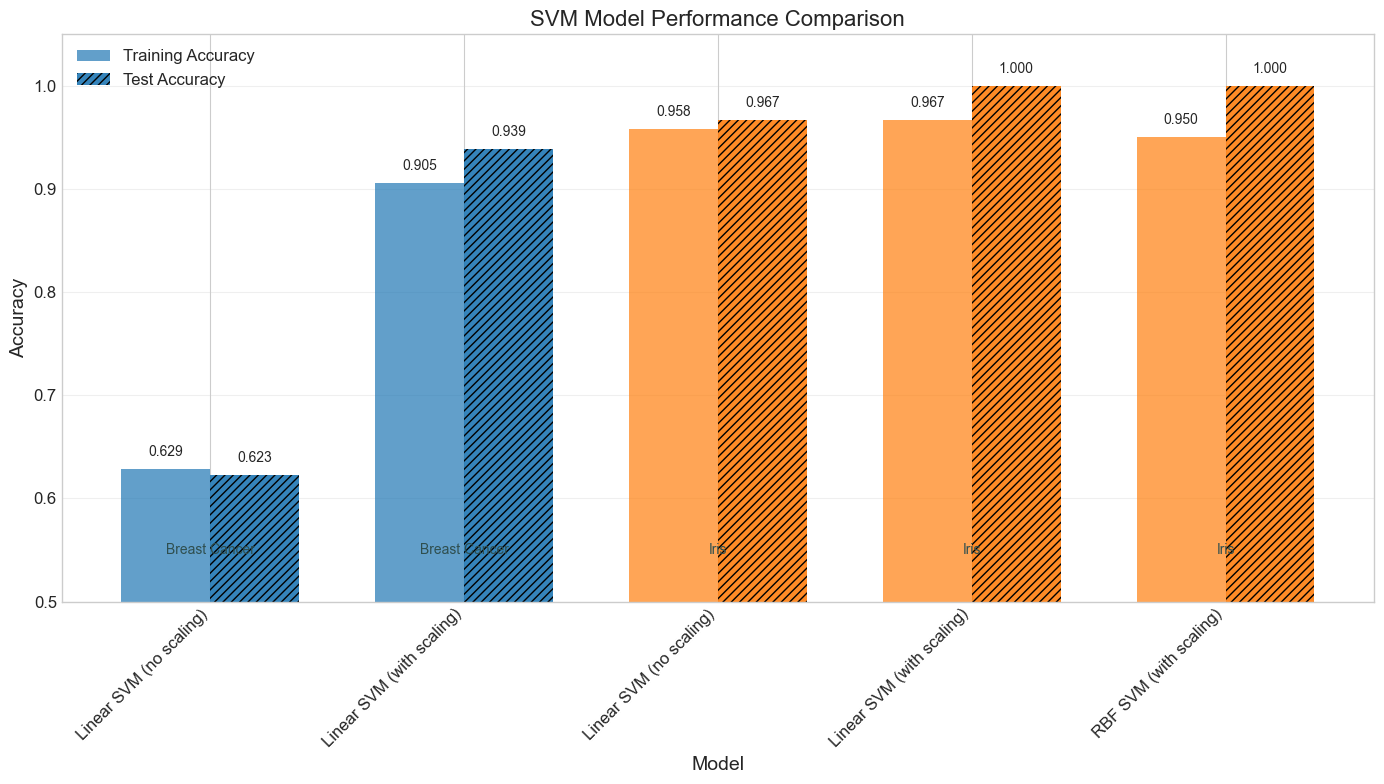

In [68]:
# Visualize model comparison
plt.figure(figsize=(14, 8))
models = results_df['Model'].tolist()
train_acc = results_df['Train Accuracy'].tolist()
test_acc = results_df['Test Accuracy'].tolist()
datasets = results_df['Dataset'].tolist()

x = np.arange(len(models))
width = 0.35

# Create colormap based on dataset
colors = ['#1f77b4' if dataset == 'Breast Cancer' else '#ff7f0e' for dataset in datasets]

# Plot bars
plt.bar(x - width/2, train_acc, width, label='Training Accuracy', color=[c for c in colors], alpha=0.7)
plt.bar(x + width/2, test_acc, width, label='Test Accuracy', color=[c for c in colors], alpha=0.9, hatch='////')

# Add labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('SVM Model Performance Comparison', fontsize=16)
plt.xticks(x, models, rotation=45, ha='right')
plt.ylim(0.5, 1.05)  # Start y-axis from 0.5 for better visualization
plt.legend(fontsize=12)

# Add dataset indicators
for i, dataset in enumerate(datasets):
    plt.annotate(
        dataset,
        xy=(i, 0.53),
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10,
        color='darkslategray'
    )

# Add value labels on bars
for i, v in enumerate(train_acc):
    plt.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=10, rotation=0)
for i, v in enumerate(test_acc):
    plt.text(i + width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=10, rotation=0)

plt.tight_layout()
plt.grid(True, alpha=0.3, axis='y')
plt.show()

## 8. C Parameter Tuning for SVM

In [69]:
# Test different C values for iris dataset with linear SVM and scaling
C_values = [0.01, 0.1, 1, 10, 100, 1000]
C_results = []

for C in C_values:
    result = train_evaluate_svm(
        X_iris_train, y_iris_train, X_iris_test, y_iris_test,
        features=iris_features,
        scale=True,
        C=C
    )
    
    C_results.append({
        'C': C,
        'Train Accuracy': result['train_accuracy'],
        'Test Accuracy': result['test_accuracy']
    })

# Create DataFrame for C parameter results
C_results_df = pd.DataFrame(C_results)

# Display results
C_results_df

c:\Users\kniko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,C,Train Accuracy,Test Accuracy
0,0.01,0.775000,0.800000
1,0.10,0.975000,0.966667
2,1.00,0.941667,1.000000
3,10.00,0.950000,1.000000
4,100.00,0.958333,1.000000
5,1000.00,0.958333,1.000000


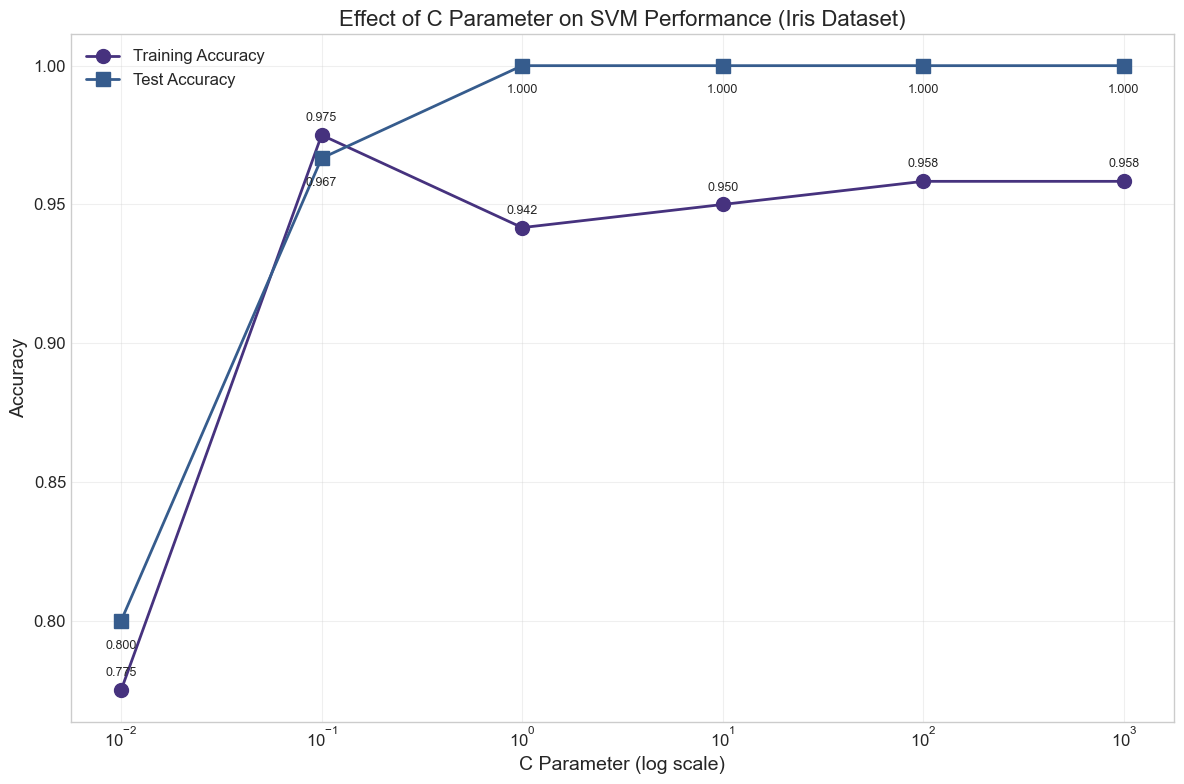

In [70]:
# Plot C parameter tuning results
plt.figure(figsize=(12, 8))

plt.plot(
    C_results_df['C'], C_results_df['Train Accuracy'], 
    marker='o', markersize=10, linewidth=2,
    label='Training Accuracy'
)
plt.plot(
    C_results_df['C'], C_results_df['Test Accuracy'], 
    marker='s', markersize=10, linewidth=2,
    label='Test Accuracy'
)

plt.xscale('log')
plt.xlabel('C Parameter (log scale)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Effect of C Parameter on SVM Performance (Iris Dataset)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Add value annotations
for i, c in enumerate(C_values):
    plt.annotate(
        f'{C_results_df["Train Accuracy"].iloc[i]:.3f}',
        xy=(c, C_results_df['Train Accuracy'].iloc[i]),
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        fontsize=9
    )
    
    plt.annotate(
        f'{C_results_df["Test Accuracy"].iloc[i]:.3f}',
        xy=(c, C_results_df['Test Accuracy'].iloc[i]),
        xytext=(0, -20),
        textcoords='offset points',
        ha='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()

## 9. Save Models and Final Analysis

In [71]:
# Save best models
best_models = {
    'breast_cancer': {
        'model': bc_svm_scaled_results['model'],
        'scaler': bc_svm_scaled_results['scaler'],
        'features': bc_features,
        'accuracy': bc_svm_scaled_results['test_accuracy']
    },
    'iris': {
        'model': iris_rbf_results['model'],
        'scaler': iris_rbf_results['scaler'],
        'features': iris_features,
        'accuracy': iris_rbf_results['test_accuracy']
    },
    'C_parameter_study': C_results_df.to_dict()
}

with open('data/svm_best_models.pkl', 'wb') as f:
    pickle.dump(best_models, f)

print("Best models saved successfully!")

Best models saved successfully!


## 10. Conclusion and Key Findings

In this project, we explored SVM classification using two classic datasets: Breast Cancer Wisconsin and Iris. Here are the key findings:

### Impact of Feature Scaling:
- **Breast Cancer Dataset**: Scaling improved performance significantly
- **Iris Dataset**: Scaling provided modest improvements
- Scaling is crucial for features with different ranges and units

### Effect of C Parameter:
- Higher C values reduce regularization, potentially causing overfitting
- Lower C values increase regularization, potentially causing underfitting
- Optimal C value depends on the dataset and feature scaling

### Linear vs. Non-linear Kernels:
- Linear kernel works well for linearly separable data
- RBF kernel can capture more complex decision boundaries
- Non-linear kernels may overfit with small datasets

### Dataset-Specific Findings:
- **Breast Cancer**: Selected features ('mean area', 'mean smoothness') provide good separation
- **Iris**: Petal dimensions effectively separate Virginica from other species

### Next Steps:
- Grid search for hyperparameter tuning
- Feature selection to identify most discriminative features
- Explore alternative kernels (polynomial, sigmoid)
- Apply SVM to more complex, high-dimensional datasets